# 1.1 Library Setup

In [1]:
# Import Libraries
from pathlib import Path
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
import gc

# 1.2 Data Loading & Understanding

## Loading & Inspection

In [2]:
# --- Loading All the Datasets  ---
# Load all the CSV files 
# Check the dimensions and memory usage of each dataset as loading them
# Check the memory usage and data types of each dataset
# Check for missing values and negative values in numeric columns
# Check for duplicate rows
# Store all datasets in a dictionary for easy access

folder_path = Path('../data/raw')
file_paths = list(folder_path.glob('*.csv'))
dataframes = {} # This will hold all the data

print(f"--- Starting to Load {len(file_paths)} Datasets ---")

total_memory = 0

for path in file_paths:    
    try:
        # 1. Load
        df_name = path.stem # Gets filename without extension
        df = pd.read_csv(path)
        
        # 2. Store in dictionary
        dataframes[df_name] = df
        
        # 3. Print simplified report
        print(f"\nLoaded: {df_name}")
        print(f"- Shape : {df.shape}")
        print(f"- Memory: {df.memory_usage(deep=True).sum() / 1024**2 :.2f} MB")
        print(f"- Dtypes:\n{df.dtypes.value_counts()}")
        
        # 4. Quick check for NaNs, Negatives, & Duplicates to 
        if df.isna().any().any():
            print("   [!] Contains Missing Values")
        
        num_cols = df.select_dtypes(include=np.number)
        if not num_cols.empty and (num_cols < 0).any().any():
            print("   [!] Contains Negative Values")
            
        if df.duplicated().any():
            print("   [!] Contains Duplicate Rows")
            
        # 5. Update total memory usage
        total_memory += df.memory_usage(deep=True).sum()

    except Exception as e:
        print(f"Could not load {path.name}: {e}")

print(f"\n--- Done. All {len(dataframes)} DataFrames are ready in 'dataframes' dictionary. ---")
print(f"Total Memory Usage: {total_memory / 1024**2 :.2f} MB")

--- Starting to Load 14 Datasets ---

Loaded: test_cxid
- Shape : (13001, 2)
- Memory: 1.60 MB
- Dtypes:
object    1
int64     1
Name: count, dtype: int64

Loaded: train_cxid
- Shape : (52004, 2)
- Memory: 6.40 MB
- Dtypes:
object    1
int64     1
Name: count, dtype: int64

Loaded: usage_app_facebook_daily
- Shape : (65005, 92)
- Memory: 57.16 MB
- Dtypes:
float64    90
object      2
Name: count, dtype: int64

Loaded: usage_app_helakuru_daily
- Shape : (65005, 92)
- Memory: 57.16 MB
- Dtypes:
float64    90
object      2
Name: count, dtype: int64

Loaded: usage_app_other
- Shape : (65005, 92)
- Memory: 56.60 MB
- Dtypes:
float64    90
object      2
Name: count, dtype: int64

Loaded: usage_app_tiktok_daily
- Shape : (65005, 92)
- Memory: 57.03 MB
- Dtypes:
float64    90
object      2
Name: count, dtype: int64

Loaded: usage_app_whatsapp_daily
- Shape : (65005, 92)
- Memory: 57.16 MB
- Dtypes:
float64    90
object      2
Name: count, dtype: int64

Loaded: usage_app_youtube_daily
- Shape :

In [3]:
# Check each datastet's first few rows
print("--- Dataset Preview ---")
for name, df in dataframes.items():
    print(f"\nDataset: {name}")
    display(df.head(3))

--- Dataset Preview ---

Dataset: test_cxid


,customer_id,churn
0,e4b72c1c45b982f8b39f4cab732c433b24d03d52e5a0b1...,1
1,b9996abf8720c9c554b78617f27827c18e597b378227d2...,0
2,18a737f17b32318ed4a99a0a03dbc5d9b60181cf91a3d8...,1



Dataset: train_cxid


,customer_id,churn
0,a8cfed4379972f41e730a31a5c500e9ed2592374761b09...,0
1,d231e6c6dfd09290c16f640288edcd0ec5de526681c5e8...,0
2,787d994dc6e133f5711414ac7959d3263af560f19dd634...,0



Dataset: usage_app_facebook_daily


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_facebook_daily,79.42,72.61,72.15,82.82,61.06,57.91,55.59,56.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_app_facebook_daily,36.78,57.70,51.60,36.29,0.00,0.00,0.00,71.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_app_facebook_daily,82.51,67.23,80.07,76.98,62.51,58.72,64.33,50.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Dataset: usage_app_helakuru_daily


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_helakuru_daily,25.92,12.67,0.00,32.72,1.56,26.49,0.00,17.72,...,8.41,0.0,1.63,17.21,5.22,0.0,19.59,22.63,0.0,29.62
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_app_helakuru_daily,6.52,10.24,6.28,11.56,12.88,10.53,6.57,7.87,...,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_app_helakuru_daily,10.08,9.73,9.69,9.36,9.29,8.96,8.86,8.84,...,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00



Dataset: usage_app_other


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_other,53.00,130.73,7.86,67.71,153.38,35.92,128.60,30.61,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_app_other,108.84,164.10,1047.23,0.00,784.37,1283.02,0.00,0.00,...,0.0,523.22,266.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_app_other,89.54,108.57,103.84,103.62,41.36,81.85,75.02,60.39,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Dataset: usage_app_tiktok_daily


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_tiktok_daily,53.22,65.80,52.87,59.78,50.75,52.37,44.12,40.88,...,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_app_tiktok_daily,0.00,220.87,0.00,239.61,0.00,495.53,70.34,0.00,...,16.57,0.0,0.0,328.19,61.27,296.18,0.0,228.2,211.05,0.0
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_app_tiktok_daily,100.64,21.11,102.24,68.50,17.07,3.77,2.36,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0



Dataset: usage_app_whatsapp_daily


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_whatsapp_daily,0.00,4.18,20.33,7.89,18.37,7.17,5.22,12.77,...,0.00,0.00,0.00,0.0,2.31,0.00,0.0,0.0,1.22,0.00
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_app_whatsapp_daily,3.72,5.73,12.54,0.00,22.30,0.00,8.62,11.05,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_app_whatsapp_daily,0.00,31.91,1.21,12.90,9.40,0.00,18.47,0.57,...,33.16,22.42,42.58,19.3,44.79,34.93,28.9,0.0,0.75,8.07



Dataset: usage_app_youtube_daily


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_youtube_daily,98.50,0.00,284.82,150.05,0.00,261.89,44.89,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,50.28,0.00
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_app_youtube_daily,104.69,96.02,0.00,182.04,159.57,33.08,98.99,87.18,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_app_youtube_daily,119.08,36.45,0.00,457.02,32.20,235.58,156.84,55.59,...,120.0,0.0,92.7,138.12,323.63,323.41,407.17,212.18,360.65,78.44



Dataset: usage_pack_data


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_pack_data,133.63,95.24,72.55,80.52,68.79,147.01,39.03,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_pack_data,93.05,103.67,104.78,90.14,90.26,113.09,106.36,105.97,...,55.37,46.78,39.54,45.0,48.22,41.51,40.42,40.6,60.24,41.57
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_pack_data,60.60,94.42,0.00,20.95,76.09,0.00,2.35,69.21,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00



Dataset: usage_pack_vas


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_pack_vas,0.00,39.34,0.00,8.93,0.00,30.60,0.00,12.60,...,0.0,78.5,32.44,0.0,115.95,0.0,67.98,10.95,0.0,48.35
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_pack_vas,4.14,155.10,193.30,0.00,33.86,17.99,77.64,46.81,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,36.61,0.0,0.00
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_pack_vas,19.70,18.98,18.17,17.51,16.61,15.77,15.31,14.04,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00



Dataset: usage_voice_d2d_incoming


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_voice_d2d_incoming,42.33,19.14,44.60,25.89,54.83,0.00,87.88,28.69,...,0.0,0.00,0.0,0.00,0.00,1.13,0.0,0.00,0.00,0.0
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_voice_d2d_incoming,12.20,57.80,36.51,60.92,60.23,0.00,9.54,43.44,...,0.0,17.35,0.0,52.57,54.03,0.00,0.0,21.33,49.74,0.0
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_voice_d2d_incoming,16.37,20.88,19.58,17.42,16.93,14.14,16.08,16.18,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0



Dataset: usage_voice_d2d_outgoing


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_voice_d2d_outgoing,18.70,31.26,23.55,24.57,25.31,27.55,22.21,28.95,...,89.75,96.37,100.26,92.31,100.27,94.69,95.86,94.35,101.72,95.24
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_voice_d2d_outgoing,19.56,19.19,18.59,17.62,16.53,16.69,15.71,15.14,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_voice_d2d_outgoing,22.25,15.80,19.96,17.82,14.20,12.89,17.36,14.78,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



Dataset: usage_voice_d2nd_outgoing


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_voice_d2nd_outgoing,34.17,36.79,40.29,24.56,0.00,62.36,11.17,18.77,...,0.0,7.57,8.48,0.0,0.0,0.0,25.06,20.59,0.0,18.05
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_voice_d2nd_outgoing,0.00,0.00,0.00,29.43,22.56,0.00,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_voice_d2nd_outgoing,87.20,49.47,147.98,22.70,0.00,88.56,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00



Dataset: usage_voice_nd2d_incoming


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_voice_nd2d_incoming,21.50,17.17,16.66,19.12,17.08,17.82,13.52,16.24,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1,f4972d45b42830d180360f2a2b5e921e5f67aa18ad09e9...,usage_voice_nd2d_incoming,0.00,108.85,46.86,0.00,72.78,19.61,0.00,25.23,...,128.85,174.84,230.78,71.38,147.8,25.08,85.53,186.05,65.12,66.02
2,9e2adb8e95b6d4f0d645ad02c8cbd935ec7701ec5da225...,usage_voice_nd2d_incoming,15.47,9.86,18.14,23.14,15.01,22.74,11.36,12.69,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


## (Initial) Business Question:
"Using a customer's behavior from their first three months (Days 1-90), can we predict if they will become **at-risk** of churning?"

## 💡Findings:
* **Data Structure:** There are two main **customer lists** (`train_cxid`, `test_cxid`) and **12 files** tracking customer **daily behavior/usage**. All 12 usage files cover the **same 65,005 total customers** (train + test).
* **"Wide" Format:** The 12 usage files are spread out **sideways**, having **90 columns** (`Day_1` to `Day_90`), where each column represents one day's activity.
* The data quality is **excellent**: there are **no missing values, duplicate entries, or incorrect negative numbers**. 
* Unfortunately, it will potentially take up a lot of space. So, **reduce memory usage significantly** by explicitly casting the types!
* **Required Next Step:** The current wide format is **not good for analysis**. It **must be converted** to a **"long" format** (stacked vertically) to allow us to build useful features.
* The **number of customers** in the train and test lists **matches** the total number of customers in the other datasets: **52,004** (train) + **13,001** (test) = **65,005** (total rows in usage files).

## Explanations For Each Dataset

---
* Core Files (The "Answers")

  * **`train_cxid.csv`**: The list of customers to **train** the model on. It includes the `customer_id` and the final `churn` answer.
  * **`test_cxid.csv`**: The list of customers to **test** the model on. It also includes the `customer_id` and the final `churn` answer.

---
* App Usage Files (What apps they used)

  * **`usage_app_facebook_daily.csv`**: Daily data (in MBs) used by the Facebook app.
  * **`usage_app_whatsapp_daily.csv`**: Daily data (in MBs) used by the WhatsApp app.
  * **`usage_app_youtube_daily.csv`**: Daily data (in MBs) used by the YouTube app.
  * **`usage_app_tiktok_daily.csv`**: Daily data (in MBs) used by the TikTok app.
  * **`usage_app_helakuru_daily.csv`**: Daily data (in MBs) used by the Helakuru app (a popular app in Sri Lanka).
  * **`usage_app_other.csv`**: Daily data (in MBs) used by all *other* apps or background processes that weren't specifically tracked.

---
* Data Pack Files (How they used data)

  * **`usage_pack_data.csv`**: The amount of money (LKR Spend) a customer spent each day on their main data plan.
  * **`usage_pack_vas.csv`**: The amount of money (LKR Spend) a customer spent each day on extra, add-on services. "VAS" means Value-Added Service. Think of these as small, optional purchases like a "1-Day Unlimited YouTube Pass" or a ringtone subscription.

---
* Voice Call Files (How they made calls)

  * **`usage_voice_d2d_incoming.csv`**: "Domestic-to-Domestic" **Incoming** calls. This is the total time (in minutes) a customer spent *receiving* calls from someone *in the same country*.
  * **`usage_voice_d2d_outgoing.csv`**: "Domestic-to-Domestic" **Outgoing** calls. This is the total time a customer spent *making* calls to someone *in the same country*.
  * **`usage_voice_d2nd_outgoing.csv`**: "Domestic-to-Non-Domestic" **Outgoing** calls. This is the total time a customer spent *making* calls *to another country* (International Calls).
  * **`usage_voice_nd2d_incoming.csv`**: "Non-Domestic-to-Domestic" **Incoming** calls. This is the total time a customer spent *receiving* calls *while traveling in another country* (Roaming).

---

In [ ]:
# Copy the training and testing targets and 
# Reduce memory usage
print("--- Preparing Training and Testing Targets ---\n")

train_cxid = dataframes['train_cxid'].copy()
train_cxid['churn'] = train_cxid['churn'].astype('int8')
del dataframes['train_cxid']  # Free up memory
print(f"Memory Usage of Training Target: {train_cxid.memory_usage(deep=True).sum() / 1024**2 :.2f} MB")
print(f"Data Types of Training Target  :\n{train_cxid.dtypes.value_counts()}")

test_cxid = dataframes['test_cxid'].copy()
test_cxid['churn'] = test_cxid['churn'].astype('int8')
del dataframes['test_cxid']  # Free up memory
gc.collect()
print(f"\nMemory Usage of Testing Target: {test_cxid.memory_usage(deep=True).sum() / 1024**2 :.2f} MB")
print(f"Data Types of Testing Target  :\n{test_cxid.dtypes.value_counts()}")

--- Preparing Training and Testing Targets ---

Memory Usage of Training Target: 6.05 MB
Data Types of Training Target  :
object    1
int8      1
Name: count, dtype: int64

Memory Usage of Testing Target: 1.51 MB
Data Types of Testing Target  :
object    1
int8      1
Name: count, dtype: int64


## Checking Imbalance

Distribution of the Target Variable 'churn':
churn
0    76.882547
1    23.117453
Name: proportion, dtype: float64
--------------------------------------------------



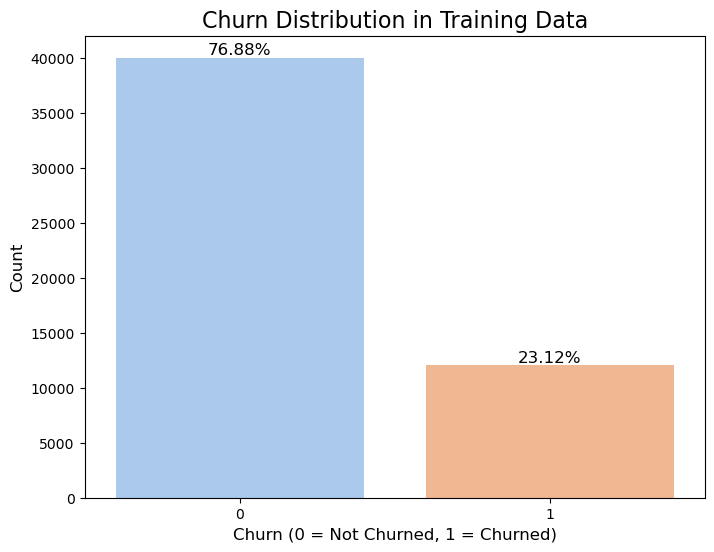

In [5]:
# Analyze the target variable 'churn'
print("Distribution of the Target Variable 'churn':")
print(train_cxid['churn'].value_counts(normalize=True) * 100)
print("-" * 50 + "\n")

# Visualize the churn distribution in the training data
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='churn', data=train_cxid, hue='churn', palette='pastel', legend=False)

# Add and determine the coordinate for percentage labels
total = len(train_cxid)
for p in ax.patches:  # Patches are the blocks of the countplot
    percentage = f'{100 * p.get_height() / total :.2f}%'  # Calculate the percentage for the label
    x = p.get_x() + p.get_width() / 2     # Finding the x point
    y = p.get_height()                    # Finding the y point
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12)

plt.title('Churn Distribution in Training Data', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)', fontsize=12)
plt.show()

## 📊 Findings:
* **Dataset Size and Integrity:** The main training list has **52,004 customer records**. The data is **perfectly clean**—there's **no missing information** in the customer identifier or the column tracking if they left (`churn`).
* **Churn Rate:** The total percentage of customers who **left (churned)** is **23.1%**. In simple terms, about **one out of every four customers** in this list has stopped using the service.
* **Class Imbalance:** This 23.1% rate shows we have an **imbalanced dataset**. The group of customers who **churned** (the "1" class) is much **smaller** than the group that **stayed** (the "0" class). This is an **important fact** that we'll have to consider when we build our prediction model.

# 1.3 Feature Engineering

We will engineer trend-based features according to expert domain knowledge and RFM principles backed by scientific papers to specifically quantify the behavioral changes—such as sudden drops in usage or disengagement from "sticky" apps—that serve as early warning signals for at-risk customers.

**References:**
* Al-Okaily, M., Al-Qudah, A. A., & Al-Majali, M. (2024). Customer churn prediction: A systematic review of recent advances, trends, and challenges in machine learning and deep learning. Applied Sciences, 7(3), 105.
* Haq, M. A. (2024). Customer churn prediction for telecommunication companies using machine learning and ensemble methods. Engineering, Technology & Applied Science Research, 14(3), 14572–14578. https://doi.org/10.48084/etasr.7480
* Sinaga, R., & Widianto, S. (2023). Understanding telecommunication customer churn: Insights from LightGBM predictive modelling and SHAP feature interpretation. ASEAN Marketing Journal, 15(1), 35–46. https://doi.org/10.7454/amj.v15i1.1229
* Verdonck, T., Baesens, B., Óskarsdóttir, M., & vanden Broucke, S. (2024). Special issue on feature engineering editorial. Machine Learning, 113(7), 3917–3928. https://doi.org/10.1007/s10994-021-06042-2

## Combining All The Usage Datasets

In [6]:
# Get all dataset names
dataset_names = list(dataframes.keys())
display(dataset_names)

['usage_app_facebook_daily',
 'usage_app_helakuru_daily',
 'usage_app_other',
 'usage_app_tiktok_daily',
 'usage_app_whatsapp_daily',
 'usage_app_youtube_daily',
 'usage_pack_data',
 'usage_pack_vas',
 'usage_voice_d2d_incoming',
 'usage_voice_d2d_outgoing',
 'usage_voice_d2nd_outgoing',
 'usage_voice_nd2d_incoming']

In [7]:
# Change the key order of the dataframes dictionary
dataset_names = [
                # All App Usage DataFrames
                'usage_app_facebook_daily', 'usage_app_youtube_daily',
                'usage_app_tiktok_daily', 'usage_app_whatsapp_daily',
                'usage_app_helakuru_daily','usage_app_other',
                # All Voice Usage DataFrames
                'usage_voice_d2d_incoming', 'usage_voice_d2d_outgoing',
                'usage_voice_nd2d_incoming', 'usage_voice_d2nd_outgoing',
                # All Package Usage DataFrames
                'usage_pack_data','usage_pack_vas',
                ]
dataframes = {key: dataframes[key] for key in dataset_names if key in dataframes}

In [8]:
# Combining All The Usage Datasets
print("--- Starting to Combine All the DataFrames ---\n")
processed_dfs = []

# Loop through each DataFrame in the dictionary's values
for name, df in dataframes.items():
    print(f"Adding the {name} DataFrame...")
    # Create a copy to avoid modifying the original DataFrame in place
    df_copy = df.copy()

    # Check for the 'customer' column and rename it to 'customer_id'
    if 'customer' in df_copy.columns:
        df_copy.rename(columns={'customer': 'customer_id'}, inplace=True)

    processed_dfs.append(df_copy)
    
# Concatenate all the DataFrames in the list vertically
combined_usage_df = pd.concat(processed_dfs)

# Define the desired order based on the dictionary keys.
# This assumes the dictionary is provided in the desired order.
usage_order = list(dataframes.keys())

# Convert 'usage_type' to a categorical type with the specified order
combined_usage_df['usage_type'] = pd.Categorical(
    combined_usage_df['usage_type'],
    categories=usage_order,
    ordered=True
)

# Sort by 'customer_id' first, then by the categorical 'usage_type'
combined_usage_df.sort_values(by=['customer_id', 'usage_type'], inplace=True)

# Reset the index to be continuous (e.g., 0, 1, 2, ...)
# drop=True prevents the old, jumbled index from being added as a new column
combined_usage_df.reset_index(drop=True, inplace=True)
print("\n--- Combined Usage DataFrame Created Successfully ---\n")

display(combined_usage_df.head(24))

--- Starting to Combine All the DataFrames ---

Adding the usage_app_facebook_daily DataFrame...
Adding the usage_app_youtube_daily DataFrame...
Adding the usage_app_tiktok_daily DataFrame...
Adding the usage_app_whatsapp_daily DataFrame...
Adding the usage_app_helakuru_daily DataFrame...
Adding the usage_app_other DataFrame...
Adding the usage_voice_d2d_incoming DataFrame...
Adding the usage_voice_d2d_outgoing DataFrame...
Adding the usage_voice_nd2d_incoming DataFrame...
Adding the usage_voice_d2nd_outgoing DataFrame...
Adding the usage_pack_data DataFrame...
Adding the usage_pack_vas DataFrame...

--- Combined Usage DataFrame Created Successfully ---



,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_app_facebook_daily,60.31,0.00,133.73,262.71,96.26,73.71,244.04,96.28,...,0.00,0.00,121.74,164.82,0.00,206.07,350.34,338.79,0.00,35.25
1,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_app_youtube_daily,0.00,242.45,274.21,0.00,313.87,257.44,542.31,1032.08,...,475.53,218.08,356.10,105.61,1176.69,719.45,428.96,779.35,634.43,0.00
2,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_app_tiktok_daily,39.77,280.53,168.41,100.44,492.71,56.37,154.88,154.74,...,15.40,343.39,316.47,310.91,0.00,292.52,317.00,230.29,193.47,362.92
3,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_app_whatsapp_daily,12.23,6.47,10.51,9.33,10.04,9.94,7.43,11.93,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_app_helakuru_daily,32.38,58.27,12.05,0.00,27.85,12.25,0.00,16.93,...,76.74,43.14,47.39,84.97,0.00,22.36,0.00,8.07,8.85,0.00
5,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_app_other,159.70,56.24,135.03,120.87,118.67,43.57,151.19,60.03,...,330.51,73.36,96.64,204.75,125.87,114.97,137.31,105.80,177.22,109.30
6,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_voice_d2d_incoming,36.91,6.43,28.52,23.28,11.89,0.00,13.96,6.27,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_voice_d2d_outgoing,55.62,67.57,98.07,215.60,0.00,0.00,0.00,0.00,...,0.00,38.04,0.00,0.00,72.86,3.89,20.86,251.46,0.00,0.00
8,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_voice_nd2d_incoming,10.47,16.54,15.46,19.80,16.75,17.94,20.50,24.95,...,0.00,0.00,1.46,1.65,0.00,3.04,42.00,47.37,33.51,30.80
9,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,usage_voice_d2nd_outgoing,34.91,16.74,17.92,27.30,37.04,35.32,8.65,11.88,...,34.59,43.07,37.07,12.33,50.26,36.39,23.14,29.00,31.72,23.56


In [13]:
# Create a function for dataset inspection
def inspect_dataset(df, name, negative_check=True):
    print(f"--- Inspection of Dataset {name} ---")

    # Check the dimensions (rows, columns)
    print(f"   - The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

    # Check if any value in the numerical columns is less than 0
    if negative_check:
        # Select only the numerical columns
        numerical_cols = df.select_dtypes(include=np.number)
        print(f"   - Negative Values Found: {(numerical_cols < 0).any().any()}")

    # Check for the number of duplicate rows
    print(f"   - Duplicate Rows Found: {df.duplicated().any()}")

    # Check for missing values in each column
    print(f"   - Missing Values Found: {df.isnull().any().any()}")
    
    # Check the data types and their counts
    print("   - Data Types:")
    print(df.dtypes.value_counts())
    
    # Total memory usage
    memory_usage = df.memory_usage(deep=True).sum() / 1024**2
    print(f"   - Memory Usage: {memory_usage :.2f} MB")

In [14]:
# Inspection of combined_usage_df
inspect_dataset(combined_usage_df, "combined_usage_df")

--- Inspection of Dataset combined_usage_df ---
   - The dataset has 780060 rows and 92 columns.
   - Negative Values Found: False
   - Duplicate Rows Found: False
   - Missing Values Found: False
   - Data Types:
float64     90
object       1
category     1
Name: count, dtype: int64
   - Memory Usage: 626.38 MB


In [11]:
# Remove the dataframes dictionary to free up memory
del dataframes
gc.collect()

0

In [17]:
# Save combined_usage_df
combined_usage_df.to_parquet('../data/interim/combined_usage.parquet', engine='fastparquet')
print("--- Combined Usage DataFrame Saved Successfully ---")

--- Combined Usage DataFrame Saved Successfully ---


In [3]:
# Set customer_id as index
usage_df = combined_usage_df.set_index('customer_id')

## --- Project Update 1: Correcting for Data Leakage ---

My initial Logistic Regression model in Notebook 3.0 showed 99% accuracy, 99% precision, and 98% recall, which is a clear sign of **data leakage**. My hypothesis is that my dataset (built from Day 1-90) already contained information about the churn event, which also happened within that same period.

**Example:** There were customers who churned on Day 45, so their usage data from Day 46 to 90 would be zero (no usage). This is a leak because **the model learned the consequence of churn, not the cause of churn**.


**Action Taken:** All previous feature engineering code will be removed. We are now re-building the new features and target variable using a proper time-windowing approach to ensure we are only using past data to predict a future event.

* **Observation Window:** Day 1-59 (January 1, 2023, to February 28, 2023)
* **Prediction Window:** Day 60-90 (March 1 to 31, 2023)

### (Updated but Not Taken) Business Question:
"Using a customer's behavior from their first 2 months (Days 1-59), can we predict if they will become **at-risk** of churning?"

In [32]:
# Check the hypothesis
# Create an interval for prediction window
pred_window_cols = [f'Day_{i}' for i in range(60, 91)]

# Calculate total usage per customer in the Prediction Window (Month 3)
# We group by customer_id since the usage DataFrame is long format
m3_usage = usage_df.loc[train_cxid['customer_id'].sort_values(inplace=False)][pred_window_cols].sum(axis=1)

# Create the flag: 1 if usage is 0, else 0
calculated_churn_flag = pd.DataFrame({})
calculated_churn_flag['number_of_unused_app'] = (m3_usage == 0).astype(int).groupby('customer_id').sum()

In [37]:
# Calculate how many customers have all apps unused
(calculated_churn_flag['number_of_unused_app'] == 12).astype(int).sum()

np.int64(1)

**Conclusion of Project Update 1:**

The result shows that there was only one customer whose usage data was zero in Month 3. This tells us that my hypothesis is incorrect. The dataset does not contain information about the churn event.

## --- Project Update 2: Fixing Target Leakage ---

After following Project Update 1, the new Logistic Regression model in Notebook 3.0 showed 99% accuracy, 99% precision, and 97% recall, which is still **too good to be true**. So, my assumption was incorrect. It's not about temporal leakage, but it's because the data is too obvious, which we call it **target leakage**. All the features have information about the target variable, the **information that would not have been available at the time of prediction**.

**Example:** Customers, who churned after using the service for 3 months, started to have low data usage in Month 2 or Month 3. **This information caused the model to seem overly accurate during training, but it'd perform poorly on real-world data because it had learned to "cheat" by using information it wouldn't have in the future**.


**Action Taken:** All previous feature engineering code will be removed. I'm now re-building the new features using a feature window separation technique to ensure I'm only using past data and data that won't be available at the time of prediction to predict a future event.

* **Observation Window:** Day 1-28 (January 1 to 28, 2023)
* **Prediction Window:** Based on the original training and testing datasets after 3 months of using the service

### Final Business Question:
"Using a customer's behavior from their first 4 weeks (Days 1-28), can we predict if they will become **at-risk** of churning?"

## Base Feature Engineering

Engineer total, active days, average, median, and standard deviation features.

In [45]:
# ONLY use data from Days 1-28 for features
OBSERVATION_WINDOW_COLS = [f'Day_{i}' for i in range(1, 29)] # Days 1-28

# Define the two equal windows for trend analysis
W1_2_COLS = [f'Day_{i}' for i in range(1, 15)]  # Days 1-14
W3_4_COLS = [f'Day_{i}' for i in range(15, 29)] # Days 15-28

# Define the 12 usage types
USAGE_TYPES = [
    'usage_app_facebook_daily', 'usage_app_youtube_daily', 'usage_app_tiktok_daily',
    'usage_app_whatsapp_daily', 'usage_app_helakuru_daily', 'usage_app_other',
    'usage_voice_d2d_incoming', 'usage_voice_d2d_outgoing',
    'usage_voice_nd2d_incoming', 'usage_voice_d2nd_outgoing',
    'usage_pack_data', 'usage_pack_vas'
]

""""
Creates the base feature table (1 row per customer) using ONLY the observation window.
"""
print("--- Creating base features (1 row per customer, Days 1-28) ---")

# 1. Get the master list of customers to ensure we don't lose anyone
all_customer_ids = usage_df.index.unique()

# 2. Create a list to store the feature chunks
feature_frames = []

for usage_name in USAGE_TYPES:
    # Isolate this data type
    df_temp = usage_df[usage_df['usage_type'] == usage_name]

    # Create a temporary dictionary to hold features for THIS usage type only
    current_type_features = {}

    # --- Create features for the 2-week windows ---
    # Total Usage
    current_type_features[f'{usage_name}_total_w1_2'] = df_temp[W1_2_COLS].sum(axis=1)
    current_type_features[f'{usage_name}_total_w3_4'] = df_temp[W3_4_COLS].sum(axis=1)

    # Active Days
    current_type_features[f'{usage_name}_active_days_w1_2'] = (df_temp[W1_2_COLS] > 0).sum(axis=1)
    current_type_features[f'{usage_name}_active_days_w3_4'] = (df_temp[W3_4_COLS] > 0).sum(axis=1)

    # Average Usage
    current_type_features[f'{usage_name}_avg_daily_w1_2'] = df_temp[W1_2_COLS].mean(axis=1)
    current_type_features[f'{usage_name}_avg_daily_w3_4'] = df_temp[W3_4_COLS].mean(axis=1)
    
    # Median Usage
    current_type_features[f'{usage_name}_median_w1_2'] = df_temp[W1_2_COLS].median(axis=1)
    current_type_features[f'{usage_name}_median_w3_4'] = df_temp[W3_4_COLS].median(axis=1)
    
    # Standard Deviation
    current_type_features[f'{usage_name}_std_dev_w1_2'] = df_temp[W1_2_COLS].std(axis=1)
    current_type_features[f'{usage_name}_std_dev_w3_4'] = df_temp[W3_4_COLS].std(axis=1)
    
    # Convert this dictionary to a DataFrame and append to our list
    feature_frames.append(pd.DataFrame(current_type_features))

# 3. Concatenate all frames at once (This prevents fragmentation)
X_features = pd.concat(feature_frames, axis=1)

# 4. Reindex against the master customer list
# This ensures customers with NO usage in any category are still in the table (as rows of 0s)
X_features = X_features.reindex(all_customer_ids)

# 5. Fill NaNs (handles 0 usage days and the reindexing above)
X_features = X_features.fillna(0)

print(f"Base feature table created with shape: {X_features.shape}")

--- Creating base features (1 row per customer, Days 1-28) ---
Base feature table created with shape: (65005, 120)


In [46]:
X_features.head()

,usage_app_facebook_daily_total_w1_2,usage_app_facebook_daily_total_w3_4,usage_app_facebook_daily_active_days_w1_2,usage_app_facebook_daily_active_days_w3_4,usage_app_facebook_daily_avg_daily_w1_2,usage_app_facebook_daily_avg_daily_w3_4,usage_app_facebook_daily_median_w1_2,usage_app_facebook_daily_median_w3_4,usage_app_facebook_daily_std_dev_w1_2,usage_app_facebook_daily_std_dev_w3_4,...,usage_pack_vas_total_w1_2,usage_pack_vas_total_w3_4,usage_pack_vas_active_days_w1_2,usage_pack_vas_active_days_w3_4,usage_pack_vas_avg_daily_w1_2,usage_pack_vas_avg_daily_w3_4,usage_pack_vas_median_w1_2,usage_pack_vas_median_w3_4,usage_pack_vas_std_dev_w1_2,usage_pack_vas_std_dev_w3_4
customer_id,,,,,,,,,,,,,,,,,,,,,
0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5dc279f56aa96a365e5a,1168.00,1503.74,8,12,83.428571,107.410000,67.010,56.025,94.869309,119.787384,...,323.88,87.06,14,5,23.134286,6.218571,21.130,0.00,10.314203,13.436522
0001702d0abcdbeeb23f7c434aa6858030f365caf1464aa9c383837cba2f82a6,2003.03,1213.01,10,7,143.073571,86.643571,113.115,1.455,135.163282,148.232238,...,214.72,11.47,13,2,15.337143,0.819286,16.030,0.00,5.071640,2.091619
0001ae52a920c36edc7ab364ea58a58ca725f0ad44c02ba74ecefe08bb2b91a3,602.28,510.21,8,8,43.020000,36.443571,67.065,57.370,39.026325,32.930154,...,276.56,236.54,9,6,19.754286,16.895714,16.260,0.00,19.267870,26.807614
000205e54ddf8bc7512490895ce397647faaedc114f411b5c0a693b6f250617d,768.31,958.76,9,9,54.879286,68.482857,75.390,99.350,43.170661,53.238131,...,326.22,117.16,14,4,23.301429,8.368571,24.285,0.00,4.098362,13.767127
0002511664bff302e40b19ed6872ad4390ac59901e55e2c81a9cc02b21de783a,591.62,598.38,8,8,42.258571,42.741429,67.900,69.740,38.179640,38.545162,...,332.73,409.28,14,14,23.766429,29.234286,21.890,25.06,12.894848,12.240958


## Trend Feature Engineering

In [47]:
# Define app categories
DATA_APP_TYPES = [
    'usage_app_facebook_daily', 'usage_app_youtube_daily', 'usage_app_tiktok_daily',
    'usage_app_whatsapp_daily', 'usage_app_helakuru_daily', 'usage_app_other'
]
VIDEO_APP_TYPES = ['usage_app_youtube_daily', 'usage_app_tiktok_daily']
MESSAGING_APP_TYPES = ['usage_app_whatsapp_daily']
SPEND_TYPES = ['usage_pack_data', 'usage_pack_vas']

# --- Helper Aggregates ---
X_features['total_data_w1_2'] = X_features[[f'{col}_total_w1_2' for col in DATA_APP_TYPES]].sum(axis=1)
X_features['total_data_w3_4'] = X_features[[f'{col}_total_w3_4' for col in DATA_APP_TYPES]].sum(axis=1)

X_features['total_spend_w1_2'] = X_features[[f'{col}_total_w1_2' for col in SPEND_TYPES]].sum(axis=1)
X_features['total_spend_w3_4'] = X_features[[f'{col}_total_w3_4' for col in SPEND_TYPES]].sum(axis=1)

X_features['video_data_w1_2'] = X_features[[f'{col}_total_w1_2' for col in VIDEO_APP_TYPES]].sum(axis=1)
X_features['video_data_w3_4'] = X_features[[f'{col}_total_w3_4' for col in VIDEO_APP_TYPES]].sum(axis=1)

X_features['messaging_data_w1_2'] = X_features[[f'{col}_total_w1_2' for col in MESSAGING_APP_TYPES]].sum(axis=1)
X_features['messaging_data_w3_4'] = X_features[[f'{col}_total_w3_4' for col in MESSAGING_APP_TYPES]].sum(axis=1)

print("--- Helper Aggregates Created Successfully ---")

--- Helper Aggregates Created Successfully ---


In [49]:
# Create a safe divide function to avoid division by zero
def safe_divide(numerator, denominator):
    return (numerator / (denominator + 1e-10))

In [50]:
# 1. Trend Features (Deltas)
# Calculate percentage change: (new - old) / old
X_features['data_usage_change_2wk'] = (X_features['total_data_w3_4'] - X_features['total_data_w1_2']) * safe_divide(1, X_features['total_data_w1_2'])
X_features['spend_change_2wk'] = (X_features['total_spend_w3_4'] - X_features['total_spend_w1_2']) * safe_divide(1, X_features['total_spend_w1_2'])
X_features['video_data_change_2wk'] = (X_features['video_data_w3_4'] - X_features['video_data_w1_2']) * safe_divide(1, X_features['video_data_w1_2'])
X_features['messaging_data_change_2wk'] = (X_features['messaging_data_w3_4'] - X_features['messaging_data_w1_2']) * safe_divide(1, X_features['messaging_data_w1_2'])

# 2. Behavioral Ratios (Profile for Weeks 3-4) 
X_features['pct_data_on_video_w3_4'] = safe_divide(X_features['video_data_w3_4'], X_features['total_data_w3_4'])
X_features['pct_data_on_messaging_w3_4'] = safe_divide(X_features['messaging_data_w3_4'], X_features['total_data_w3_4'])
X_features['pct_spend_on_vas_w3_4'] = safe_divide(X_features['usage_pack_vas_total_w3_4'], X_features['total_spend_w3_4'])

# 3. Diversity & Engagement Features 
X_features['distinct_services_w1_2'] = (X_features[[f'{col}_total_w1_2' for col in USAGE_TYPES]] > 0).sum(axis=1)
X_features['distinct_services_w3_4'] = (X_features[[f'{col}_total_w3_4' for col in USAGE_TYPES]] > 0).sum(axis=1)
X_features['change_in_distinct_services'] = X_features['distinct_services_w3_4'] - X_features['distinct_services_w1_2']

# Handle Inf values that may have been created by safe_divide (if old value was 0)
X_features.replace([np.inf, -np.inf], 0, inplace=True)

print(f"Trend features created with shape: {X_features.shape}")

Trend features created with shape: (65005, 138)


In [51]:
X_features.head()

,usage_app_facebook_daily_total_w1_2,usage_app_facebook_daily_total_w3_4,usage_app_facebook_daily_active_days_w1_2,usage_app_facebook_daily_active_days_w3_4,usage_app_facebook_daily_avg_daily_w1_2,usage_app_facebook_daily_avg_daily_w3_4,usage_app_facebook_daily_median_w1_2,usage_app_facebook_daily_median_w3_4,usage_app_facebook_daily_std_dev_w1_2,usage_app_facebook_daily_std_dev_w3_4,...,data_usage_change_2wk,spend_change_2wk,video_data_change_2wk,messaging_data_change_2wk,pct_data_on_video_w3_4,pct_data_on_messaging_w3_4,pct_spend_on_vas_w3_4,distinct_services_w1_2,distinct_services_w3_4,change_in_distinct_services
customer_id,,,,,,,,,,,,,,,,,,,,,
0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5dc279f56aa96a365e5a,1168.00,1503.74,8,12,83.428571,107.410000,67.010,56.025,94.869309,119.787384,...,-0.259292,-0.447120,-0.512011,-0.700565,0.491513,0.003276,0.110943,12,12,0
0001702d0abcdbeeb23f7c434aa6858030f365caf1464aa9c383837cba2f82a6,2003.03,1213.01,10,7,143.073571,86.643571,113.115,1.455,135.163282,148.232238,...,-0.639524,-0.939514,-0.717311,-1.000000,0.370143,0.000000,0.121530,12,11,-1
0001ae52a920c36edc7ab364ea58a58ca725f0ad44c02ba74ecefe08bb2b91a3,602.28,510.21,8,8,43.020000,36.443571,67.065,57.370,39.026325,32.930154,...,-0.318902,-0.671908,-0.314575,0.720937,0.683029,0.020300,0.329425,12,12,0
000205e54ddf8bc7512490895ce397647faaedc114f411b5c0a693b6f250617d,768.31,958.76,9,9,54.879286,68.482857,75.390,99.350,43.170661,53.238131,...,-0.144790,-0.772462,-0.011093,-0.128974,0.530060,0.033978,0.261034,12,12,0
0002511664bff302e40b19ed6872ad4390ac59901e55e2c81a9cc02b21de783a,591.62,598.38,8,8,42.258571,42.741429,67.900,69.740,38.179640,38.545162,...,0.171502,-0.118542,0.539570,-0.486722,0.587000,0.016010,0.393913,12,12,0


# 1.4 Training and Testing Sets

In [52]:
# Create training and testing sets
X_train = X_features.loc[train_cxid['customer_id'].sort_values(inplace=False)]
X_test = X_features.loc[test_cxid['customer_id'].sort_values(inplace=False)] 

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52004 entries, 0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5dc279f56aa96a365e5a to fffff7f18e3f2477c5c981222df6260c01b0e9324cfc8758f3c1cb9e9a920d79
Columns: 138 entries, usage_app_facebook_daily_total_w1_2 to change_in_distinct_services
dtypes: float64(111), int64(27)
memory usage: 55.1+ MB


In [56]:
# Save the final training and testing sets
X_train.to_parquet('../data/processed/X_train.parquet', engine='fastparquet')
X_test.to_parquet('../data/processed/X_test.parquet', engine='fastparquet')
print("--- Final Training and Testing Sets Saved Successfully ---")

--- Final Training and Testing Sets Saved Successfully ---
